In [902]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
import random

# Suppress warnings
import warnings

warnings.filterwarnings("ignore")

## Loading the dataset

1. Batting: `batting_data.csv`
2. Bowling: `bowling_data.csv`
3. Player Name and ID Map: `player_team_name_id.csv`

In [903]:
batting_df = pd.read_csv("final_data/batting_data.csv")
batting_df

,player_id,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start,odi_number
0,440970,0,-,3,0,0,0.00,3,caught,2,Kenya,Sharjah,2 Oct 2013,ODI # 3417
1,440970,13*,-,19,0,0,68.42,5,not out,2,Kenya,Sharjah,4 Oct 2013,ODI # 3418
2,440970,38*,-,67,4,0,56.71,4,not out,2,Hong Kong,Kuala Lumpur,1 May 2014,ODI # 3487
3,440970,3,-,7,0,0,42.85,4,lbw,1,U.A.E.,Kuala Lumpur,2 May 2014,ODI # 3488
4,440970,15,21,22,2,0,68.18,4,caught,1,Zimbabwe,Bulawayo,18 Jul 2014,ODI # 3503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9326,793007,4*,4,2,1,0,200.00,11,not out,2,South Africa,Delhi,7 Oct 2023,ODI # 4661
9327,793007,DNB,-,-,-,-,-,-,-,1,Pakistan,Hyderabad,10 Oct 2023,ODI # 4665
9328,793007,0*,12,6,0,0,0.00,11,not out,1,Australia,Lucknow,16 Oct 2023,ODI # 4671
9329,793007,DNB,-,-,-,-,-,-,-,2,Netherlands,Lucknow,21 Oct 2023,ODI # 4676


In [904]:
bowling_df = pd.read_csv("final_data/bowling_data.csv")
bowling_df

,player_id,overs,maidens,runs,wickets,economy,position,innings,opposition,ground,start_date,odi_number
0,440970,DNB,-,-,-,-,-,1,Kenya,Sharjah,2 Oct 2013,ODI # 3417
1,440970,DNB,-,-,-,-,-,1,Kenya,Sharjah,4 Oct 2013,ODI # 3418
2,440970,DNB,-,-,-,-,-,1,Hong Kong,Kuala Lumpur,1 May 2014,ODI # 3487
3,440970,2.0,0,17,0,8.50,6,2,U.A.E.,Kuala Lumpur,2 May 2014,ODI # 3488
4,440970,DNB,-,-,-,-,-,2,Zimbabwe,Bulawayo,18 Jul 2014,ODI # 3503
...,...,...,...,...,...,...,...,...,...,...,...,...
9326,793007,10.0,0,86,2,8.60,2,1,South Africa,Delhi,7 Oct 2023,ODI # 4661
9327,793007,9.2,0,60,2,6.42,2,2,Pakistan,Hyderabad,10 Oct 2023,ODI # 4665
9328,793007,9.0,2,38,3,4.22,2,2,Australia,Lucknow,16 Oct 2023,ODI # 4671
9329,793007,9.4,1,49,4,5.06,1,1,Netherlands,Lucknow,21 Oct 2023,ODI # 4676


In [905]:
player_data_df = pd.read_csv("final_data/player_team_name_id.csv")
player_data_df

,team_name,player_name,player_id
0,Afghanistan,Hashmatullah Shahidi,440970
1,Afghanistan,Rahmanullah Gurbaz,974087
2,Afghanistan,Ibrahim Zadran,921509
3,Afghanistan,Reyaz Hassan,1061090
4,Afghanistan,Rahmat Shah Zurmati,533956
...,...,...,...
145,Sri Lanka,Dunith Wellalage,1152427
146,Sri Lanka,Kasun Rajitha,499594
147,Sri Lanka,Matheesha Pathirana,1194795
148,Sri Lanka,Lahiru Kumara,784375


In [906]:
# # Collect Team Names

# team_names = player_data_df['team_name'].unique().tolist()
# team_names += bowling_df['opposition'].unique().tolist()
# team_names += batting_df['Opposition'].unique().tolist()
# team_names = list(set(team_names))
# team_names

# # Encode Team Names

# te = LabelEncoder()
# te.fit(team_names)

# batting_df['Opposition'] = te.transform(batting_df['Opposition'])
# bowling_df['opposition'] = te.transform(bowling_df['opposition'])
# player_data_df['team_name'] = te.transform(player_data_df['team_name'])

## Data Preprocessing

### Batting Data

In [907]:
batting_df = batting_df.merge(player_data_df, on="player_id", how="left")
batting_df

,player_id,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start,odi_number,team_name,player_name
0,440970,0,-,3,0,0,0.00,3,caught,2,Kenya,Sharjah,2 Oct 2013,ODI # 3417,Afghanistan,Hashmatullah Shahidi
1,440970,13*,-,19,0,0,68.42,5,not out,2,Kenya,Sharjah,4 Oct 2013,ODI # 3418,Afghanistan,Hashmatullah Shahidi
2,440970,38*,-,67,4,0,56.71,4,not out,2,Hong Kong,Kuala Lumpur,1 May 2014,ODI # 3487,Afghanistan,Hashmatullah Shahidi
3,440970,3,-,7,0,0,42.85,4,lbw,1,U.A.E.,Kuala Lumpur,2 May 2014,ODI # 3488,Afghanistan,Hashmatullah Shahidi
4,440970,15,21,22,2,0,68.18,4,caught,1,Zimbabwe,Bulawayo,18 Jul 2014,ODI # 3503,Afghanistan,Hashmatullah Shahidi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9326,793007,4*,4,2,1,0,200.00,11,not out,2,South Africa,Delhi,7 Oct 2023,ODI # 4661,Sri Lanka,Dilshan Madushanka
9327,793007,DNB,-,-,-,-,-,-,-,1,Pakistan,Hyderabad,10 Oct 2023,ODI # 4665,Sri Lanka,Dilshan Madushanka
9328,793007,0*,12,6,0,0,0.00,11,not out,1,Australia,Lucknow,16 Oct 2023,ODI # 4671,Sri Lanka,Dilshan Madushanka
9329,793007,DNB,-,-,-,-,-,-,-,2,Netherlands,Lucknow,21 Oct 2023,ODI # 4676,Sri Lanka,Dilshan Madushanka


In [908]:
batting_df["player_id"].value_counts()
# Valid

253802     286
56029      261
34102      256
56143      244
56025      225
          ... 
721041       4
819507       3
1139520      2
35281        2
379887       2
Name: player_id, Length: 150, dtype: int64

#### Removing unwanted columns

In [909]:
batting_df

,player_id,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start,odi_number,team_name,player_name
0,440970,0,-,3,0,0,0.00,3,caught,2,Kenya,Sharjah,2 Oct 2013,ODI # 3417,Afghanistan,Hashmatullah Shahidi
1,440970,13*,-,19,0,0,68.42,5,not out,2,Kenya,Sharjah,4 Oct 2013,ODI # 3418,Afghanistan,Hashmatullah Shahidi
2,440970,38*,-,67,4,0,56.71,4,not out,2,Hong Kong,Kuala Lumpur,1 May 2014,ODI # 3487,Afghanistan,Hashmatullah Shahidi
3,440970,3,-,7,0,0,42.85,4,lbw,1,U.A.E.,Kuala Lumpur,2 May 2014,ODI # 3488,Afghanistan,Hashmatullah Shahidi
4,440970,15,21,22,2,0,68.18,4,caught,1,Zimbabwe,Bulawayo,18 Jul 2014,ODI # 3503,Afghanistan,Hashmatullah Shahidi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9326,793007,4*,4,2,1,0,200.00,11,not out,2,South Africa,Delhi,7 Oct 2023,ODI # 4661,Sri Lanka,Dilshan Madushanka
9327,793007,DNB,-,-,-,-,-,-,-,1,Pakistan,Hyderabad,10 Oct 2023,ODI # 4665,Sri Lanka,Dilshan Madushanka
9328,793007,0*,12,6,0,0,0.00,11,not out,1,Australia,Lucknow,16 Oct 2023,ODI # 4671,Sri Lanka,Dilshan Madushanka
9329,793007,DNB,-,-,-,-,-,-,-,2,Netherlands,Lucknow,21 Oct 2023,ODI # 4676,Sri Lanka,Dilshan Madushanka


In [910]:
batting_df.drop(columns=["Mins", "odi_number"], inplace=True)

#### Runs

In [911]:
batting_df["Runs"].unique()

array(['0', '13*', '38*', '3', '15', '11', '31', '32', '72', '14', '21',
       '2*', '12', '23', '54', '2', '34*', '37', '58', '97*', '71', '9',
       '52', '59*', '47', '18', '4', '59', '8', '76', '82', '10', '73',
       '28', '5', '88', '1*', '38', '57', '9*', '22', '15*', '13', '51',
       '80', '48*', '127', '103', '7', '106*', '17', '53', '68', '145',
       '6', '151', '1', '65', '19', '121*', '106', '162', '98', '41*',
       '100', '75', '87', '50', '35', 'DNB', '34', '100*', '26', '16',
       '48', '30', '36', '78', '108*', 'TDNB', '44', '114', '43', '56',
       '69', '29', '33', '113', '62', '46', '24', '61', '103*', '70',
       '94', '55', '45', '77*', '83', '12*', '25', '89*', '81*', '8*',
       '67', '63*', '17*', '42', '20', '104*', '60*', '20*', '3*', '77',
       '7*', '6*', '23*', '60', '41', '46*', '14*', '116', '40', '49',
       '27*', '18*', '92', '64', '27', '50*', '25*', '5*', '86', '19*',
       '16*', '57*', '11*', '35*', '39*', '4*', '0*', '10*', '21*'

In [912]:
# We can notice *, DNB, TDNB, absent in runs

# Replace *23 with 23
batting_df["Runs"].replace(to_replace="\*", value="", regex=True, inplace=True)
batting_df["Runs"].unique()

array(['0', '13', '38', '3', '15', '11', '31', '32', '72', '14', '21',
       '2', '12', '23', '54', '34', '37', '58', '97', '71', '9', '52',
       '59', '47', '18', '4', '8', '76', '82', '10', '73', '28', '5',
       '88', '1', '57', '22', '51', '80', '48', '127', '103', '7', '106',
       '17', '53', '68', '145', '6', '151', '65', '19', '121', '162',
       '98', '41', '100', '75', '87', '50', '35', 'DNB', '26', '16', '30',
       '36', '78', '108', 'TDNB', '44', '114', '43', '56', '69', '29',
       '33', '113', '62', '46', '24', '61', '70', '94', '55', '45', '77',
       '83', '25', '89', '81', '67', '63', '42', '20', '104', '60', '116',
       '40', '49', '27', '92', '64', '86', '39', '117', '85', '99', '128',
       '96', '101', '152', '124', '102', '79', '66', '93', '95', '146',
       '74', '163', '178', '84', '122', '109', '173', '119', '156', '130',
       '179', '107', '166', '134', '105', 'absent', '126', '176', '136',
       '90', '110', '144', '125', '111', '112', 'sub',

In [913]:
# Get Non numeric values

batting_df[~batting_df["Runs"].str.isnumeric()]["Runs"].value_counts()

DNB       1830
TDNB       144
absent       5
sub          1
Name: Runs, dtype: int64

In [914]:
# Remove rows with DNB, TDNB, absent, sub

batting_df.drop(
    batting_df[batting_df["Runs"].isin(["DNB", "TDNB", "absent", "sub"])].index,
    inplace=True,
)
batting_df

,player_id,Runs,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start,team_name,player_name
0,440970,0,3,0,0,0.00,3,caught,2,Kenya,Sharjah,2 Oct 2013,Afghanistan,Hashmatullah Shahidi
1,440970,13,19,0,0,68.42,5,not out,2,Kenya,Sharjah,4 Oct 2013,Afghanistan,Hashmatullah Shahidi
2,440970,38,67,4,0,56.71,4,not out,2,Hong Kong,Kuala Lumpur,1 May 2014,Afghanistan,Hashmatullah Shahidi
3,440970,3,7,0,0,42.85,4,lbw,1,U.A.E.,Kuala Lumpur,2 May 2014,Afghanistan,Hashmatullah Shahidi
4,440970,15,22,2,0,68.18,4,caught,1,Zimbabwe,Bulawayo,18 Jul 2014,Afghanistan,Hashmatullah Shahidi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9321,793007,4,2,1,0,200.00,11,not out,2,New Zealand,Auckland,25 Mar 2023,Sri Lanka,Dilshan Madushanka
9322,793007,1,5,0,0,20.00,11,not out,1,Netherlands,Bulawayo,30 Jun 2023,Sri Lanka,Dilshan Madushanka
9325,793007,0,0,0,0,-,11,not out,1,Netherlands,Harare,9 Jul 2023,Sri Lanka,Dilshan Madushanka
9326,793007,4,2,1,0,200.00,11,not out,2,South Africa,Delhi,7 Oct 2023,Sri Lanka,Dilshan Madushanka


In [915]:
batting_df[~batting_df["Runs"].str.isnumeric()]["Runs"].unique()

array([], dtype=object)

In [916]:
# Change data type of runs to int

batting_df["Runs"] = batting_df["Runs"].astype(int)
batting_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7351 entries, 0 to 9328
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   player_id    7351 non-null   int64 
 1   Runs         7351 non-null   int64 
 2   BF           7351 non-null   object
 3   4s           7351 non-null   object
 4   6s           7351 non-null   object
 5   SR           7351 non-null   object
 6   Pos          7351 non-null   object
 7   Dismissal    7351 non-null   object
 8   Inns         7351 non-null   object
 9   Opposition   7351 non-null   object
 10  Ground       7351 non-null   object
 11  Start        7351 non-null   object
 12  team_name    7351 non-null   object
 13  player_name  7351 non-null   object
dtypes: int64(2), object(12)
memory usage: 861.4+ KB


#### Data Type Conversion

In [917]:
batting_df["BF"] = batting_df["BF"].astype(int)

In [918]:
batting_df["Pos"] = batting_df["Pos"].astype(int)

In [919]:
batting_df["Dismissal"].value_counts()

caught            3730
not out           1395
bowled            1082
lbw                602
run out            375
stumped            145
retired notout      15
hit wicket           6
obstruct field       1
Name: Dismissal, dtype: int64

In [920]:
batting_df["Pos"] = batting_df["Pos"].astype(int)

In [921]:
# Replace rows with "-" in 4s and 6s with 0

batting_df["4s"].replace(to_replace="-", value=0, inplace=True)
batting_df["6s"].replace(to_replace="-", value=0, inplace=True)

In [922]:
batting_df["4s"] = batting_df["4s"].astype(int)
batting_df["6s"] = batting_df["6s"].astype(int)

In [923]:
batting_df["Ground"].value_counts()

Mirpur           467
Colombo (RPS)    321
Harare           237
Pallekele        187
The Oval         169
                ... 
Toronto            1
Jamshedpur         1
Gwalior            1
Lincoln            1
Ayr                1
Name: Ground, Length: 128, dtype: int64

In [924]:
# Collect Ground Names

ground_names = batting_df["Ground"].unique().tolist()
ground_names += bowling_df["ground"].unique().tolist()
ground_names = list(set(ground_names))
ground_names

['Hyderabad',
 'Ayr',
 'Colombo (RPS)',
 'Jamshedpur',
 'Canberra',
 'Mirpur',
 'Leeds',
 'Wankhede',
 'Kimberley',
 'Southampton',
 'Brabourne',
 'Dublin',
 'Taunton',
 'Rotterdam',
 'Khulna',
 'Whangarei',
 'Indore',
 'Hobart',
 'Dharamsala',
 'Visakhapatnam',
 'Dehradun',
 'Sydney',
 'Paarl',
 'Utrecht',
 'Toronto',
 'Bloemfontein',
 'Karachi',
 'Castries',
 'Aberdeen',
 'Rawalpindi',
 'Christchurch',
 'Hambantota',
 'Mount Maunganui',
 'Lincoln',
 "St George's",
 'Doha',
 'Amstelveen',
 'The Oval',
 'ICCA Dubai',
 'Multan',
 'Galle',
 'Dublin (Malahide)',
 'Nottingham',
 'Cape Town',
 'Kuala Lumpur',
 'Pallekele',
 'Sylhet',
 'Gwalior',
 'Jaipur',
 'Cuttack',
 'Kingston',
 'Providence',
 'North Sound',
 'Dunedin',
 'Gqeberha',
 'Queenstown',
 'Gros Islet',
 'Pune',
 'Cairns',
 'Dubai (DSC)',
 'Sharjah',
 'Hamilton',
 'Kanpur',
 'Roseau',
 'Port of Spain',
 'Nagpur',
 'Nairobi (Gym)',
 'Lahore',
 'East London',
 'Chattogram',
 'Bengaluru',
 'Vadodara',
 'Bridgetown',
 'Colombo (SSC)

In [925]:
# ge = LabelEncoder()
# ge.fit(ground_names)
# batting_df['Ground'] = ge.transform(batting_df['Ground'])
# bowling_df['ground'] = ge.transform(bowling_df['ground'])

In [926]:
batting_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7351 entries, 0 to 9328
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   player_id    7351 non-null   int64 
 1   Runs         7351 non-null   int64 
 2   BF           7351 non-null   int64 
 3   4s           7351 non-null   int64 
 4   6s           7351 non-null   int64 
 5   SR           7351 non-null   object
 6   Pos          7351 non-null   int64 
 7   Dismissal    7351 non-null   object
 8   Inns         7351 non-null   object
 9   Opposition   7351 non-null   object
 10  Ground       7351 non-null   object
 11  Start        7351 non-null   object
 12  team_name    7351 non-null   object
 13  player_name  7351 non-null   object
dtypes: int64(6), object(8)
memory usage: 861.4+ KB


In [927]:
# Replace rows with "-" in SR with 0

batting_df["SR"].replace(to_replace="-", value=0, inplace=True)
batting_df["SR"] = batting_df["SR"].astype(float)

### Bowling Data

In [928]:
bowling_df = bowling_df.merge(player_data_df, on="player_id", how="left")
bowling_df

,player_id,overs,maidens,runs,wickets,economy,position,innings,opposition,ground,start_date,odi_number,team_name,player_name
0,440970,DNB,-,-,-,-,-,1,Kenya,Sharjah,2 Oct 2013,ODI # 3417,Afghanistan,Hashmatullah Shahidi
1,440970,DNB,-,-,-,-,-,1,Kenya,Sharjah,4 Oct 2013,ODI # 3418,Afghanistan,Hashmatullah Shahidi
2,440970,DNB,-,-,-,-,-,1,Hong Kong,Kuala Lumpur,1 May 2014,ODI # 3487,Afghanistan,Hashmatullah Shahidi
3,440970,2.0,0,17,0,8.50,6,2,U.A.E.,Kuala Lumpur,2 May 2014,ODI # 3488,Afghanistan,Hashmatullah Shahidi
4,440970,DNB,-,-,-,-,-,2,Zimbabwe,Bulawayo,18 Jul 2014,ODI # 3503,Afghanistan,Hashmatullah Shahidi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9326,793007,10.0,0,86,2,8.60,2,1,South Africa,Delhi,7 Oct 2023,ODI # 4661,Sri Lanka,Dilshan Madushanka
9327,793007,9.2,0,60,2,6.42,2,2,Pakistan,Hyderabad,10 Oct 2023,ODI # 4665,Sri Lanka,Dilshan Madushanka
9328,793007,9.0,2,38,3,4.22,2,2,Australia,Lucknow,16 Oct 2023,ODI # 4671,Sri Lanka,Dilshan Madushanka
9329,793007,9.4,1,49,4,5.06,1,1,Netherlands,Lucknow,21 Oct 2023,ODI # 4676,Sri Lanka,Dilshan Madushanka


#### Removing unwanted columns

In [929]:
bowling_df.drop(columns=["odi_number"], inplace=True)
bowling_df

,player_id,overs,maidens,runs,wickets,economy,position,innings,opposition,ground,start_date,team_name,player_name
0,440970,DNB,-,-,-,-,-,1,Kenya,Sharjah,2 Oct 2013,Afghanistan,Hashmatullah Shahidi
1,440970,DNB,-,-,-,-,-,1,Kenya,Sharjah,4 Oct 2013,Afghanistan,Hashmatullah Shahidi
2,440970,DNB,-,-,-,-,-,1,Hong Kong,Kuala Lumpur,1 May 2014,Afghanistan,Hashmatullah Shahidi
3,440970,2.0,0,17,0,8.50,6,2,U.A.E.,Kuala Lumpur,2 May 2014,Afghanistan,Hashmatullah Shahidi
4,440970,DNB,-,-,-,-,-,2,Zimbabwe,Bulawayo,18 Jul 2014,Afghanistan,Hashmatullah Shahidi
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9326,793007,10.0,0,86,2,8.60,2,1,South Africa,Delhi,7 Oct 2023,Sri Lanka,Dilshan Madushanka
9327,793007,9.2,0,60,2,6.42,2,2,Pakistan,Hyderabad,10 Oct 2023,Sri Lanka,Dilshan Madushanka
9328,793007,9.0,2,38,3,4.22,2,2,Australia,Lucknow,16 Oct 2023,Sri Lanka,Dilshan Madushanka
9329,793007,9.4,1,49,4,5.06,1,1,Netherlands,Lucknow,21 Oct 2023,Sri Lanka,Dilshan Madushanka


#### Overs

In [930]:
bowling_df["overs"].unique()

array(['DNB', '2.0', '1.0', 'TDNB', '3.0', '5.0', '1.5', '5.3', '6.0',
       '8.0', '4.0', '1.1', '9.0', '10.0', '9.5', '5.1', '7.0', '8.3',
       '9.4', '6.4', '5.2', '7.1', '4.1', '3.5', '8.2', '8.5', '8.1',
       '7.3', '9.2', '4.4', '4.2', '5.4', '9.3', '8.4', '7.2', '7.5',
       '4.5', '1.4', '3.2', '6.1', '6.2', '0.1', '6.5', '2.4', '0.5',
       '5.5', 'sub', '1.3', '3.1', '9.1', '6.3', '1.2', '0.2', '2.3',
       '2.5', '7.4', '0.4', '2.2', '0.3', '3.3', '4.3'], dtype=object)

In [931]:
# We can notice DNB, TDNB, sub in overs. Drop them

bowling_df.drop(
    bowling_df[bowling_df["overs"].isin(["DNB", "TDNB", "sub"])].index, inplace=True
)
bowling_df["overs"] = bowling_df["overs"].astype(float)
bowling_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5171 entries, 3 to 9330
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   player_id    5171 non-null   int64  
 1   overs        5171 non-null   float64
 2   maidens      5171 non-null   object 
 3   runs         5171 non-null   object 
 4   wickets      5171 non-null   object 
 5   economy      5171 non-null   object 
 6   position     5171 non-null   object 
 7   innings      5171 non-null   object 
 8   opposition   5171 non-null   object 
 9   ground       5171 non-null   object 
 10  start_date   5171 non-null   object 
 11  team_name    5171 non-null   object 
 12  player_name  5171 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 565.6+ KB


#### Runs

In [932]:
bowling_df["runs"] = bowling_df["runs"].astype(int)
bowling_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5171 entries, 3 to 9330
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   player_id    5171 non-null   int64  
 1   overs        5171 non-null   float64
 2   maidens      5171 non-null   object 
 3   runs         5171 non-null   int64  
 4   wickets      5171 non-null   object 
 5   economy      5171 non-null   object 
 6   position     5171 non-null   object 
 7   innings      5171 non-null   object 
 8   opposition   5171 non-null   object 
 9   ground       5171 non-null   object 
 10  start_date   5171 non-null   object 
 11  team_name    5171 non-null   object 
 12  player_name  5171 non-null   object 
dtypes: float64(1), int64(2), object(10)
memory usage: 565.6+ KB


#### Wickets

In [933]:
bowling_df["wickets"] = bowling_df["wickets"].astype(int)
bowling_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5171 entries, 3 to 9330
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   player_id    5171 non-null   int64  
 1   overs        5171 non-null   float64
 2   maidens      5171 non-null   object 
 3   runs         5171 non-null   int64  
 4   wickets      5171 non-null   int64  
 5   economy      5171 non-null   object 
 6   position     5171 non-null   object 
 7   innings      5171 non-null   object 
 8   opposition   5171 non-null   object 
 9   ground       5171 non-null   object 
 10  start_date   5171 non-null   object 
 11  team_name    5171 non-null   object 
 12  player_name  5171 non-null   object 
dtypes: float64(1), int64(3), object(9)
memory usage: 565.6+ KB


In [934]:
bowling_df["economy"] = bowling_df["economy"].astype(float)
bowling_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5171 entries, 3 to 9330
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   player_id    5171 non-null   int64  
 1   overs        5171 non-null   float64
 2   maidens      5171 non-null   object 
 3   runs         5171 non-null   int64  
 4   wickets      5171 non-null   int64  
 5   economy      5171 non-null   float64
 6   position     5171 non-null   object 
 7   innings      5171 non-null   object 
 8   opposition   5171 non-null   object 
 9   ground       5171 non-null   object 
 10  start_date   5171 non-null   object 
 11  team_name    5171 non-null   object 
 12  player_name  5171 non-null   object 
dtypes: float64(2), int64(3), object(8)
memory usage: 565.6+ KB


#### Innings

In [935]:
bowling_df["innings"] = bowling_df["innings"].astype(int)
bowling_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5171 entries, 3 to 9330
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   player_id    5171 non-null   int64  
 1   overs        5171 non-null   float64
 2   maidens      5171 non-null   object 
 3   runs         5171 non-null   int64  
 4   wickets      5171 non-null   int64  
 5   economy      5171 non-null   float64
 6   position     5171 non-null   object 
 7   innings      5171 non-null   int64  
 8   opposition   5171 non-null   object 
 9   ground       5171 non-null   object 
 10  start_date   5171 non-null   object 
 11  team_name    5171 non-null   object 
 12  player_name  5171 non-null   object 
dtypes: float64(2), int64(4), object(7)
memory usage: 565.6+ KB


In [936]:
# Reset index
batting_df.reset_index(drop=True, inplace=True)
bowling_df.reset_index(drop=True, inplace=True)

### Label Encoding

We have already encoded the `team_name`, `ground_name` beforehand to avoid any data integrity issues.

#### Batting Data

In [937]:
dismissal_encoder = LabelEncoder()
dismissal_encoder.fit(batting_df["Dismissal"])
batting_df["Dismissal"] = dismissal_encoder.transform(batting_df["Dismissal"])
batting_df

,player_id,Runs,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start,team_name,player_name
0,440970,0,3,0,0,0.00,3,1,2,Kenya,Sharjah,2 Oct 2013,Afghanistan,Hashmatullah Shahidi
1,440970,13,19,0,0,68.42,5,4,2,Kenya,Sharjah,4 Oct 2013,Afghanistan,Hashmatullah Shahidi
2,440970,38,67,4,0,56.71,4,4,2,Hong Kong,Kuala Lumpur,1 May 2014,Afghanistan,Hashmatullah Shahidi
3,440970,3,7,0,0,42.85,4,3,1,U.A.E.,Kuala Lumpur,2 May 2014,Afghanistan,Hashmatullah Shahidi
4,440970,15,22,2,0,68.18,4,1,1,Zimbabwe,Bulawayo,18 Jul 2014,Afghanistan,Hashmatullah Shahidi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7346,793007,4,2,1,0,200.00,11,4,2,New Zealand,Auckland,25 Mar 2023,Sri Lanka,Dilshan Madushanka
7347,793007,1,5,0,0,20.00,11,4,1,Netherlands,Bulawayo,30 Jun 2023,Sri Lanka,Dilshan Madushanka
7348,793007,0,0,0,0,0.00,11,4,1,Netherlands,Harare,9 Jul 2023,Sri Lanka,Dilshan Madushanka
7349,793007,4,2,1,0,200.00,11,4,2,South Africa,Delhi,7 Oct 2023,Sri Lanka,Dilshan Madushanka


### Visualization

#### Batting Data

##### Runs

In [938]:
highest_scores = batting_df.groupby(["player_name"])["Runs"].max().reset_index()
highest_scores

,player_name,Runs
0,Abdul Rahman Rahmani,4
1,Abdullah Shafique,113
2,Adam Zampa,36
3,Adil Rashid,69
4,Aiden Markram,175
...,...,...
144,Usama Mir,20
145,Vikram Singh,8
146,Virat Kohli,183
147,Wesley Barresi,137


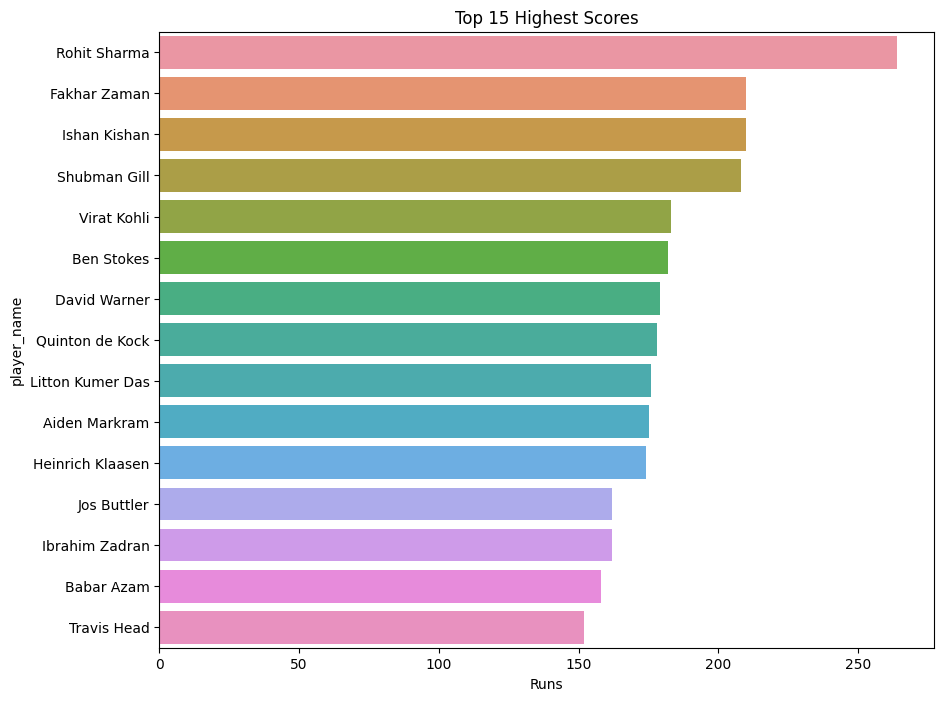

In [939]:
# Get top 15 highest scores
highest_scores.sort_values(by="Runs", ascending=False, inplace=True)
# Horizontal bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x="Runs", y="player_name", data=highest_scores[:15])
plt.title("Top 15 Highest Scores")
plt.show()

##### Feature Distribution

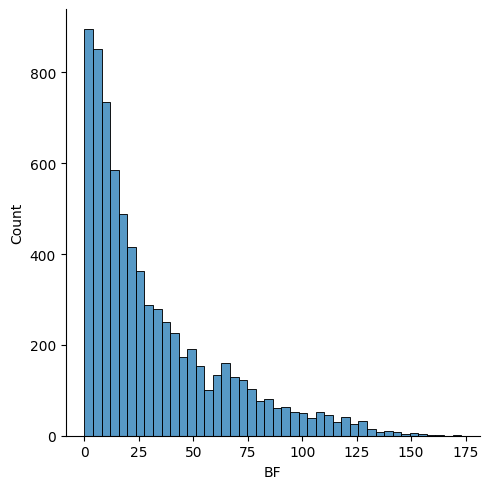

In [940]:
sns.displot(batting_df["BF"])

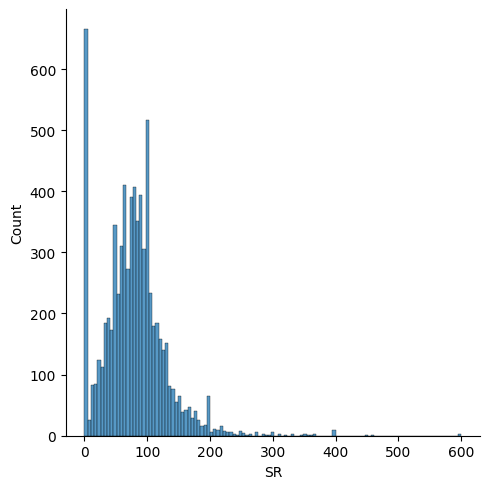

In [941]:
sns.displot(batting_df["SR"])

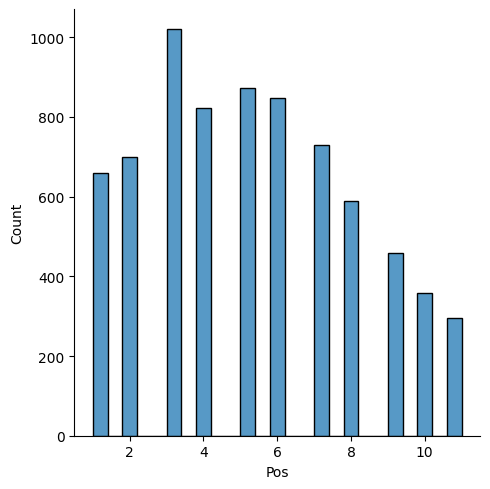

In [942]:
sns.displot(batting_df["Pos"])

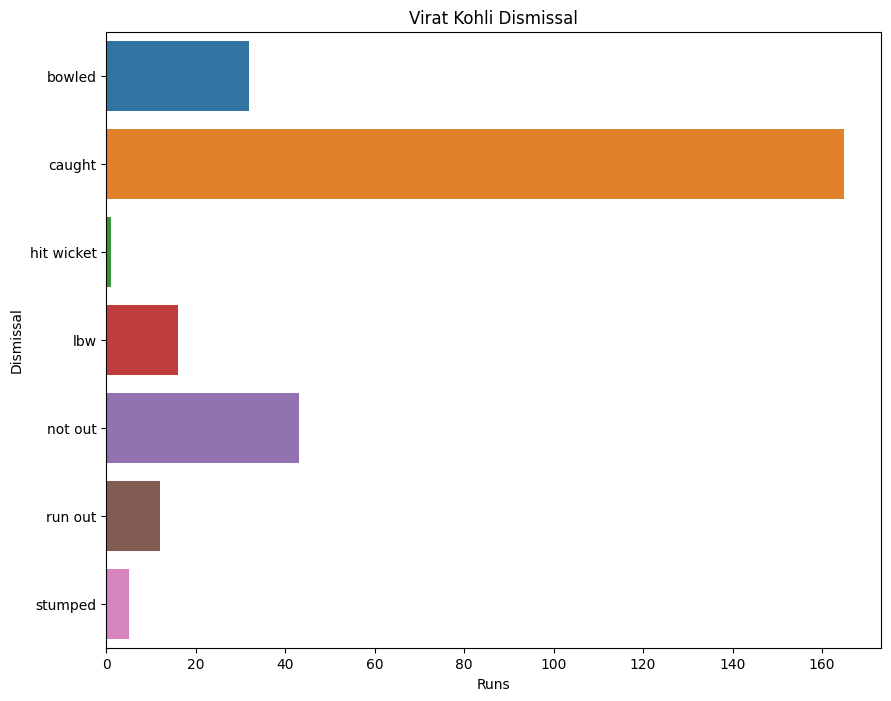

In [943]:
dismissal_df = (
    batting_df.groupby(["player_name", "Dismissal"])["Runs"].count().reset_index()
)
dismissal_df["Dismissal"] = dismissal_encoder.inverse_transform(
    dismissal_df["Dismissal"]
)

# Just Virat Kohli Dismissal
plt.figure(figsize=(10, 8))
sns.barplot(
    x="Runs",
    y="Dismissal",
    data=dismissal_df[dismissal_df["player_name"] == "Virat Kohli"],
)
plt.title("Virat Kohli Dismissal")
plt.show()

## Feature Selection

In [944]:
batting_df.columns

Index(['player_id', 'Runs', 'BF', '4s', '6s', 'SR', 'Pos', 'Dismissal', 'Inns',
       'Opposition', 'Ground', 'Start', 'team_name', 'player_name'],
      dtype='object')

<Axes: >

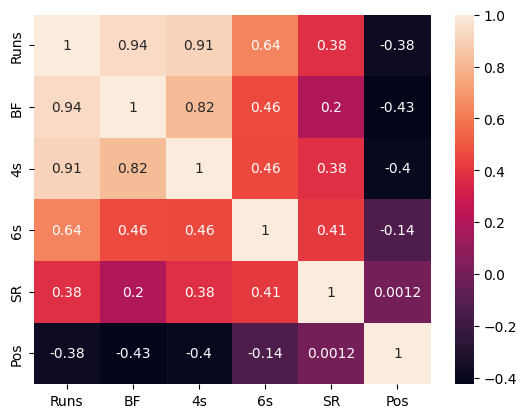

In [945]:
heatmap_df = batting_df[["Runs", "BF", "4s", "6s", "SR", "Pos", "Ground", "Opposition"]]
sns.heatmap(heatmap_df.corr(), annot=True)

Runs and Balls Faced are highly correlated. So, it has a greater impact on the model. Let's plot and see.

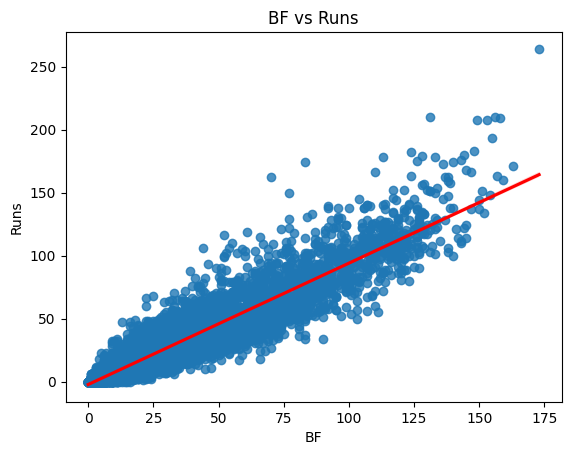

In [946]:
# Red regression line
sns.regplot(x="BF", y="Runs", data=batting_df, line_kws={"color": "red"})
plt.title("BF vs Runs")
plt.show()

## One Hot Encoding

In [947]:
# Encoding team names with dummies. One hot encoding

dummy_encoded_bdf = pd.get_dummies(
    batting_df[["player_name", "Opposition", "Ground"]], prefix=""
).astype(int)
dummy_encoded_bdf.rename(columns=lambda x: re.sub(r"_v", "", x), inplace=True)
dummy_encoded_bdf.rename(columns=lambda y: re.sub(r"_", "", y), inplace=True)
dummy_encoded_bdf.astype(float)

,Abdul Rahman Rahmani,Abdullah Shafique,Adam Zampa,Adil Rashid,Aiden Markram,Alex Carey,Andile Phehlukwayo,Aryan Dutt,Azmatullah Omarzai,Babar Azam,...,The Oval,Thiruvananthapuram,Toronto,Townsville,Utrecht,Vadodara,Visakhapatnam,Wankhede,Wellington,Whangarei
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7347,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7348,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7349,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [948]:
bdf_copy = batting_df.copy()

In [949]:
merged_bdf = pd.concat([dummy_encoded_bdf, bdf_copy], axis="columns")
merged_bdf.describe()

,Abdul Rahman Rahmani,Abdullah Shafique,Adam Zampa,Adil Rashid,Aiden Markram,Alex Carey,Andile Phehlukwayo,Aryan Dutt,Azmatullah Omarzai,Babar Azam,...,Wellington,Whangarei,player_id,Runs,BF,4s,6s,SR,Pos,Dismissal
count,7351.000000,7351.000000,7351.000000,7351.000000,7351.000000,7351.000000,7351.000000,7351.000000,7351.000000,7351.000000,...,7351.000000,7351.000000,7.351000e+03,7351.000000,7351.000000,7351.000000,7351.000000,7351.000000,7351.000000,7351.000000
mean,0.000408,0.001088,0.006122,0.008706,0.007754,0.008978,0.006666,0.003129,0.001632,0.014964,...,0.013468,0.000544,3.967865e+05,28.243096,31.678139,2.552442,0.541559,79.327902,5.253979,2.041627
std,0.020199,0.032973,0.078006,0.092907,0.087721,0.094334,0.081377,0.055852,0.040373,0.121417,...,0.115274,0.023322,2.705328e+05,32.010620,31.118406,3.256548,1.200626,50.557999,2.790967,1.988787
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,7.656000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,2.472350e+05,5.000000,8.000000,0.000000,0.000000,50.000000,3.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,3.264340e+05,16.000000,21.000000,1.000000,0.000000,77.770000,5.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,5.339560e+05,41.000000,47.000000,4.000000,1.000000,100.000000,7.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.278252e+06,264.000000,173.000000,33.000000,16.000000,600.000000,11.000000,8.000000


In [950]:
final_df = merged_bdf.drop(["player_name", "Opposition"], axis="columns")
final_df

,Abdul Rahman Rahmani,Abdullah Shafique,Adam Zampa,Adil Rashid,Aiden Markram,Alex Carey,Andile Phehlukwayo,Aryan Dutt,Azmatullah Omarzai,Babar Azam,...,BF,4s,6s,SR,Pos,Dismissal,Inns,Ground,Start,team_name
0,0,0,0,0,0,0,0,0,0,0,...,3,0,0,0.00,3,1,2,Sharjah,2 Oct 2013,Afghanistan
1,0,0,0,0,0,0,0,0,0,0,...,19,0,0,68.42,5,4,2,Sharjah,4 Oct 2013,Afghanistan
2,0,0,0,0,0,0,0,0,0,0,...,67,4,0,56.71,4,4,2,Kuala Lumpur,1 May 2014,Afghanistan
3,0,0,0,0,0,0,0,0,0,0,...,7,0,0,42.85,4,3,1,Kuala Lumpur,2 May 2014,Afghanistan
4,0,0,0,0,0,0,0,0,0,0,...,22,2,0,68.18,4,1,1,Bulawayo,18 Jul 2014,Afghanistan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7346,0,0,0,0,0,0,0,0,0,0,...,2,1,0,200.00,11,4,2,Auckland,25 Mar 2023,Sri Lanka
7347,0,0,0,0,0,0,0,0,0,0,...,5,0,0,20.00,11,4,1,Bulawayo,30 Jun 2023,Sri Lanka
7348,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.00,11,4,1,Harare,9 Jul 2023,Sri Lanka
7349,0,0,0,0,0,0,0,0,0,0,...,2,1,0,200.00,11,4,2,Delhi,7 Oct 2023,Sri Lanka


## Model Building

In [951]:
player_df = final_df[["Virat Kohli", "Australia", "Runs", "BF", "Inns", "Bengaluru", "4s", "6s", "SR"]]
player_df

,Virat Kohli,Australia,Runs,BF,Inns,Bengaluru,4s,6s,SR
0,0,0,0,3,2,0,0,0,0.00
1,0,0,13,19,2,0,0,0,68.42
2,0,0,38,67,2,0,4,0,56.71
3,0,0,3,7,1,0,0,0,42.85
4,0,0,15,22,1,0,2,0,68.18
...,...,...,...,...,...,...,...,...,...
7346,0,0,4,2,2,0,1,0,200.00
7347,0,0,1,5,1,0,0,0,20.00
7348,0,0,0,0,1,0,0,0,0.00
7349,0,0,4,2,2,0,1,0,200.00


In [952]:
X = player_df.drop(["Runs"], axis="columns")
y = player_df["Runs"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [953]:
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9751617110348064

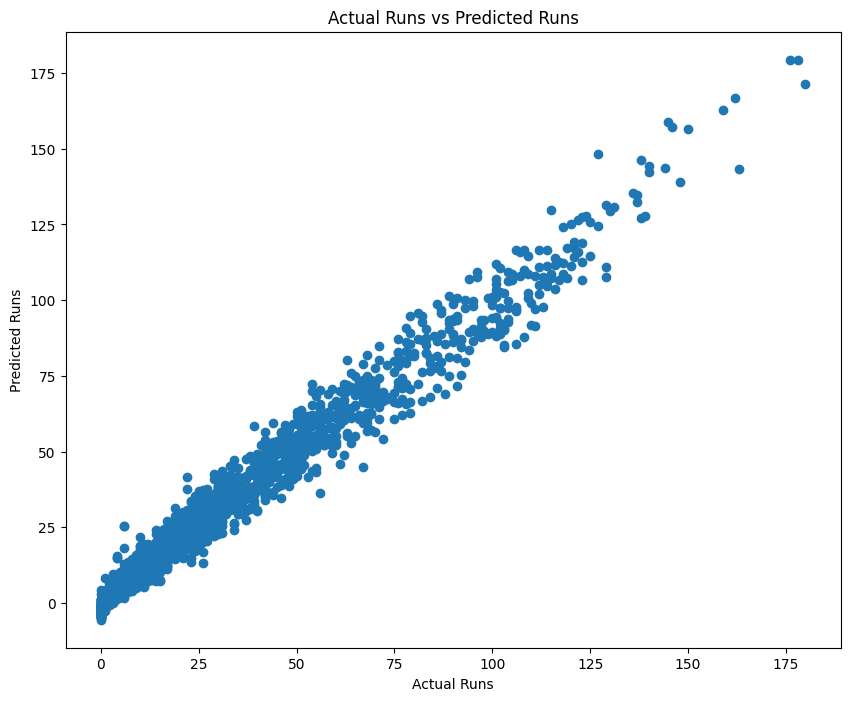

In [954]:
y_pred = model.predict(X_test)

# plot the predicted values along with the actual values
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Runs")
plt.ylabel("Predicted Runs")
plt.title("Actual Runs vs Predicted Runs")
plt.show()

In [955]:
X_test

,Virat Kohli,Australia,BF,Inns,Bengaluru,4s,6s,SR
2685,0,0,9,1,0,0,0,33.33
2747,0,1,56,2,0,9,0,107.14
1354,0,0,11,2,0,0,1,72.72
5946,0,0,20,1,0,2,2,160.00
6589,0,0,4,1,0,0,0,0.00
...,...,...,...,...,...,...,...,...
2272,0,0,71,2,0,6,0,71.83
5927,0,0,5,2,0,0,0,40.00
5225,0,1,33,1,0,2,0,78.78
5950,0,0,21,2,0,2,0,85.71


### Generalizing

In [956]:
def build_model(player_name, opposition_team, ground_name):
    player_df = final_df[
        [player_name, opposition_team, "Runs", "BF", "Inns", ground_name, "4s", "6s", "SR"]
    ]

    X = player_df.drop(["Runs"], axis="columns")
    y = player_df["Runs"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)

    dt_model = DecisionTreeRegressor()
    dt_model.fit(X_train, y_train)

    rf_model = RandomForestRegressor()
    rf_model.fit(X_train, y_train)

    # gb_model = GradientBoostingRegressor()
    # gb_model.fit(X_train, y_train)

    return linear_model, dt_model, rf_model, X_train, X_test, y_train, y_test, player_df


In [957]:
linear_model, dt_model, rf_model, X_train, X_test, y_train, y_test, player_df = build_model("Virat Kohli", "Australia", "Bengaluru")

In [958]:
# Accuracies

print("Linear Regression Accuracy: ", linear_model.score(X_test, y_test))
print("Decision Tree Accuracy: ", dt_model.score(X_test, y_test))
print("Random Forest Accuracy: ", rf_model.score(X_test, y_test))
# print("Gradient Boosting Accuracy: ", gb_model.score(X_test, y_test))

Linear Regression Accuracy:  0.9740585685323643
Decision Tree Accuracy:  0.9951435592085435
Random Forest Accuracy:  0.997501069254064


In [959]:
# Performance Metrics

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = linear_model.predict(X_test)
print("Linear Regression Metrics")
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))

print()
y_pred = dt_model.predict(X_test)
print("Decision Tree Metrics")
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))

print()
y_pred = rf_model.predict(X_test)
print("Random Forest Metrics")
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))

Linear Regression Metrics
Mean Squared Error:  25.06897312286581
Mean Absolute Error:  3.6224802117384796
R2 Score:  0.9740585685323643

Decision Tree Metrics
Mean Squared Error:  4.693109700815956
Mean Absolute Error:  0.8381686310063463
R2 Score:  0.9951435592085435

Random Forest Metrics
Mean Squared Error:  2.41488708068903
Mean Absolute Error:  0.46658658204895737
R2 Score:  0.997501069254064


In [960]:
def predict_runs(player_name, opposition_name, ground_name, career_sr):
    try:
        linear_model, dt_model, rf_model, X_train, X_test, y_train, y_test, player_df = build_model(player_name, opposition_name, ground_name)

        accuracy_list = [linear_model.score(X_test, y_test), dt_model.score(X_test, y_test), rf_model.score(X_test, y_test)]

        output_string = ""

        output_string += "Linear Regression Accuracy: " + str(linear_model.score(X_test, y_test)) + "\n"
        output_string += "Decision Tree Accuracy: " + str(dt_model.score(X_test, y_test)) + "\n"
        output_string += "Random Forest Accuracy: " + str(rf_model.score(X_test, y_test)) + "\n"

        # print("Linear Regression Accuracy: ", linear_model.score(X_test, y_test))
        # print("Decision Tree Accuracy: ", dt_model.score(X_test, y_test))
        # print("Random Forest Accuracy: ", rf_model.score(X_test, y_test))

        max_index = 0
        for i in range(len(accuracy_list)):
            if accuracy_list[i] > accuracy_list[max_index]:
                max_index = i

        career_BF_avg = max(player_df["BF"].mean() + random.randint(-20, 30), player_df["BF"].mean())
        career_6s_avg = player_df["6s"].mean()
        career_4s_avg = player_df["4s"].mean()

        if max_index == 0:
            # Linear Regression
            output_string += "Model Chosen: Linear Regression" + "\n"
            # print("Model Chosen: Linear Regression")
            runs = linear_model.predict([[1, 1, career_BF_avg, 1, 1, career_4s_avg, career_6s_avg, career_sr]])
            return int(runs[0]), output_string
        elif max_index == 1:
            # Decision Tree
            output_string += "Model Chosen: Decision Tree" + "\n"
            # print("Model Chosen: Decision Tree")
            runs = dt_model.predict([[1, 1, career_BF_avg, 1, 1, career_4s_avg, career_6s_avg, career_sr]])
            return int(runs[0]), output_string
        else:
            # Random Forest
            output_string += "Model Chosen: Random Forest" + "\n"
            # print("Model Chosen: Random Forest")
            runs = rf_model.predict([[1, 1, career_BF_avg, 1, 1, career_4s_avg, career_6s_avg, career_sr]])
            return int(runs[0]), output_string
        
        return -1
    
    except:
        return -1


In [961]:
career_data_df = pd.read_csv("final_data/player_{team_name_id_role}_with_career_summary_batting.csv")
career_data_df

,team_name,player_name,player_id,player_role,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,Afghanistan,Hashmatullah Shahidi,440970,Top order Batter,2013-2023,70,70,11,2001,97*,33.91,2962,67.55,0,18,5,173,12
1,Afghanistan,Rahmanullah Gurbaz,974087,Wicketkeeper Batter,2021-2023,32,32,1,1182,151,38.12,1349,87.62,5,4,1,107,44
2,Afghanistan,Ibrahim Zadran,921509,Opening Batter,2019-2023,25,25,2,1123,162,48.82,1366,82.21,4,5,2,119,15
3,Afghanistan,Reyaz Hassan,1061090,Batter,2022-2023,5,4,0,120,50,30.00,192,62.50,0,1,0,12,2
4,Afghanistan,Rahmat Shah Zurmati,533956,Allrounder,2013-2023,103,99,4,3481,114,36.64,4902,71.01,5,25,5,300,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Sri Lanka,Dunith Wellalage,1152427,Bowler,18,15,3,207,42*,17.25,269,76.95,0,0,3,16,5,NaN
146,Sri Lanka,Kasun Rajitha,499594,Bowler,2018-2023,32,17,7,103,33,10.30,165,62.42,0,0,3,12,1
147,Sri Lanka,Matheesha Pathirana,1194795,Bowler,12,7,2,11,5,2.20,35,31.42,0,0,2,2,0,NaN
148,Sri Lanka,Lahiru Kumara,784375,Bowler,2017-2023,28,16,6,55,10,5.50,122,45.08,0,0,1,7,1


In [962]:
# Predict for all Indian players. Use BF, 4s, 6s, SR from career data. Avg them with Mat

# Get all Indian players
players_df = career_data_df[career_data_df["team_name"] == "India"]
players_df

,team_name,player_name,player_id,player_role,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
60,India,Rohit Sharma,34102,Top order Batter,2007-2023,257,249,36,10510,264,49.34,11504,91.35,31,54,16,971,312
61,India,Hardik Pandya,625371,Allrounder,2016-2023,86,61,9,1769,92*,34.01,1603,110.35,0,11,4,132,67
62,India,Shubman Gill,1070173,Opening Batter,2019-2023,39,39,6,2021,208,61.24,1974,102.38,6,10,1,228,42
63,India,Virat Kohli,253802,Top order Batter,2008-2023,287,275,43,13437,183,57.91,14350,93.63,48,69,16,1255,148
64,India,Shreyas Iyer,642519,Top order Batter,2017-2023,53,48,5,1935,113*,45.00,1998,96.84,3,15,1,188,40
65,India,KL Rahul,422108,Wicketkeeper Batter,2016-2023,67,63,13,2507,112,50.14,2885,86.89,6,16,2,196,55
66,India,Ravindra Jadeja,234675,Allrounder,2009-2023,192,129,46,2683,87,32.32,3179,84.39,0,13,6,195,52
67,India,Ravichandran Ashwin,26421,Bowling Allrounder,2010-2023,116,63,20,707,65,16.44,813,86.96,0,1,6,60,7
68,India,Shardul Thakur,475281,Bowler,2017-2023,47,25,6,329,50*,17.31,313,105.11,0,1,1,31,9
69,India,Jasprit Bumrah,625383,Bowler,2016-2023,84,24,13,89,16,8.09,155,57.41,0,0,5,10,1


In [963]:
players_df["player_role"].value_counts()

# Filter to only Top order Batter, Allrounder, Wicketkeeper Batter, Opening Batter, Batter
players_df = players_df[players_df["player_role"].isin(["Top order Batter", "Allrounder", "Wicketkeeper Batter", "Opening Batter", "Batter"])]
players_df

,team_name,player_name,player_id,player_role,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
60,India,Rohit Sharma,34102,Top order Batter,2007-2023,257,249,36,10510,264,49.34,11504,91.35,31,54,16,971,312
61,India,Hardik Pandya,625371,Allrounder,2016-2023,86,61,9,1769,92*,34.01,1603,110.35,0,11,4,132,67
62,India,Shubman Gill,1070173,Opening Batter,2019-2023,39,39,6,2021,208,61.24,1974,102.38,6,10,1,228,42
63,India,Virat Kohli,253802,Top order Batter,2008-2023,287,275,43,13437,183,57.91,14350,93.63,48,69,16,1255,148
64,India,Shreyas Iyer,642519,Top order Batter,2017-2023,53,48,5,1935,113*,45.00,1998,96.84,3,15,1,188,40
65,India,KL Rahul,422108,Wicketkeeper Batter,2016-2023,67,63,13,2507,112,50.14,2885,86.89,6,16,2,196,55
66,India,Ravindra Jadeja,234675,Allrounder,2009-2023,192,129,46,2683,87,32.32,3179,84.39,0,13,6,195,52
73,India,Ishan Kishan,720471,Wicketkeeper Batter,2021-2023,27,24,2,933,210,42.40,913,102.19,1,7,1,95,33
74,India,Surya Kumar Yadav,446507,Batter,2021-2023,32,30,4,718,72*,27.61,682,105.27,0,4,3,72,19


In [965]:
for row in players_df.iterrows():
    player_name = row[1]["player_name"]
    team_name = row[1]["team_name"]
    opposition_name = "South Africa"
    ground_name = "Bengaluru"
    career_sr = row[1]["SR"]
    runs, output_string = predict_runs(player_name, opposition_name, ground_name, career_sr)
    print(player_name, ":", runs)
    print(output_string)

Rohit Sharma : 50
Linear Regression Accuracy: 0.9734135519090653
Decision Tree Accuracy: 0.9948951073002693
Random Forest Accuracy: 0.9973167409693027
Model Chosen: Random Forest

Hardik Pandya : 57
Linear Regression Accuracy: 0.9731219859693958
Decision Tree Accuracy: 0.9951849540343394
Random Forest Accuracy: 0.9978090450550567
Model Chosen: Random Forest

Shubman Gill : 32
Linear Regression Accuracy: 0.976713328438785
Decision Tree Accuracy: 0.9948926465021912
Random Forest Accuracy: 0.9981997456440067
Model Chosen: Random Forest

Virat Kohli : 30
Linear Regression Accuracy: 0.9755309077681742
Decision Tree Accuracy: 0.9926351742900408
Random Forest Accuracy: 0.9957705270470837
Model Chosen: Random Forest

Shreyas Iyer : 30
Linear Regression Accuracy: 0.9771963413618515
Decision Tree Accuracy: 0.9942970366503731
Random Forest Accuracy: 0.9961208194932019
Model Chosen: Random Forest

KL Rahul : 27
Linear Regression Accuracy: 0.9748528616330786
Decision Tree Accuracy: 0.99419953541934